In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ex2data1.txt",names=['s1','s2','y'],header=None)
data.head()

,s1,s2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


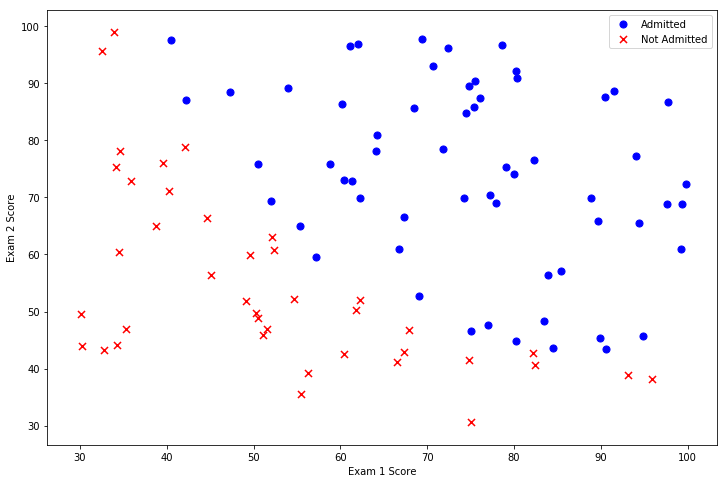

In [3]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['s1'],positive['s2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['s1'],negative['s2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")
plt.show()

In [4]:
#定义数据
x = data.values[:,0:2]
y = data.values[:,2:3]
m = x.shape[0]
n = x.shape[1]
x = np.column_stack((np.ones(m),x))
theta = np.zeros(n+1)
cval = []
print(x.shape)
print(y.shape)
print(theta.shape)

(100, 3)
(100, 1)
(3,)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

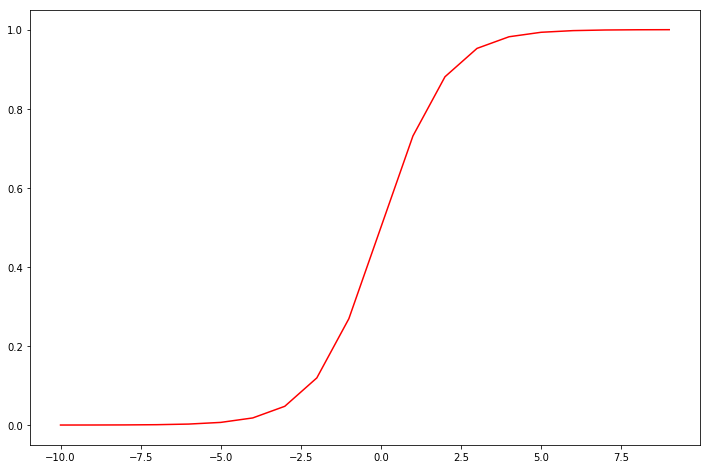

In [6]:
nums = np.arange(-10, 10, step=1)
fig,ax = plt.subplots(figsize = (12,8))
ax.plot(nums,sigmoid(nums),'r')
plt.show()

In [7]:
def cost(theta,x,y):
    theta = np.matrix(theta) #向量转矩阵
#     print(theta)
#     x = np.matrix(x)
#     y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply((1 - y),np.log(1 - sigmoid(x * theta.T)))
    return np.sum(first - second) / m

In [8]:
cost(theta,x,y)

0.6931471805599453

In [9]:
def gradient(theta,x,y):
    theta = np.matrix(theta) 
#     x = np.matrix(x)
#     y = np.matrix(y)
    
#     parameters = int(theta.ravel().shape[1])
#     grad = np.zeros(parameters)
#     error = sigmiod(x * theta.T) - y
#     for i in range(parameters):
#         term = np.multiply(error,x[:,i])
#         grad[i] = np.sum(term) / m
    grad = (1 / m) * x.T @ (sigmoid(x @ theta.T) - y) 
        
    return grad

In [10]:
gradient(theta,x,y)

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

In [11]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))
result

(array([-25.16131862,   0.20623159,   0.20147149]), 36, 0)

In [12]:
cost(result[0],x,y)

0.20349770158947464

In [13]:
def predict(theta,x):
    probability = sigmoid(x * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [14]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,x)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [15]:
now_theta = result[0]
coef = -(now_theta / now_theta[2])

x = np.arange(130,step = 0.1)
y = coef[0] + coef[1] * x

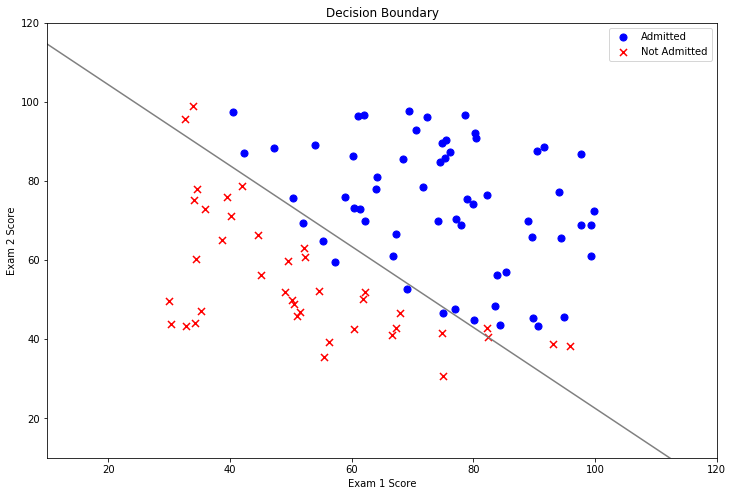

In [16]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['s1'],positive['s2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['s1'],negative['s2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")

plt.plot(x, y, 'grey')
plt.xlim(10, 120)
plt.ylim(10, 120)
plt.title('Decision Boundary')
plt.show()

## 正则化逻辑回归

In [17]:
data2 = pd.read_csv('ex2data2.txt',names=['s1','s2','y'],header=None)
data2.head()

,s1,s2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


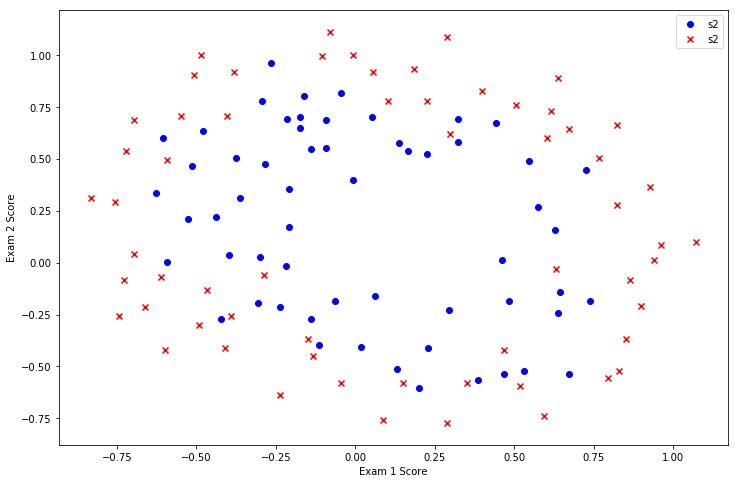

In [18]:
positive = data2[data2['y'].isin([1])]
negative = data2[data2['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['s1'],positive['s2'],c='b',marker='o')
ax.scatter(negative['s1'],negative['s2'],c='r',marker='x')
ax.legend(loc='best')
ax.set_xlabel("Exam 1 Score")
ax.set_ylabel("Exam 2 Score")
plt.show()

In [19]:
#参数映射
degree = 5
x1 = data2.values[:,0:1]
x2 = data2.values[:,1:2]
for i in range(1,degree):
    for j in range(0,i + 1):
        data2['F' + str(i - j) + str(j)] = x1 ** (i - j) * x2 ** j

data2.drop('s1', axis=1, inplace=True)
data2.drop('s2', axis=1, inplace=True) #丢弃前2行

data2.head() # F10 = x1  F21= X1**2 * x2

,y,F10,F01,F20,F11,F02,F30,F21,F12,F03,F40,F31,F22,F13,F04
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,0.000007,0.000094,0.001286,0.017551,0.239497
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,0.000074,-0.000546,0.004035,-0.029801,0.220095
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,0.002086,-0.006757,0.021886,-0.070895,0.229642
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,0.019775,-0.026483,0.035465,-0.047494,0.063602
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,0.069393,-0.062956,0.057116,-0.051818,0.047011


In [20]:
#参数定义 
x = data2.values[:,1:data2.shape[1]]
y = data2.values[:,0:1]
m = x.shape[0]
n = x.shape[1]
x = np.column_stack((np.ones(m),x))
theta = np.zeros(n+1)
cval = []

In [21]:
x.shape

(118, 15)

In [22]:
theta.shape

(15,)

In [23]:
#x(m,n+1)  
#theta(n+1,)     matrix---> theta(1,n+1)
#first(m,1)
#second(m,1)
def cost_reg(theta,x,y,reg):
    theta = np.matrix(theta)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))  #matrix的*是矩阵乘法
    second = np.multiply((1 - y),np.log(1 - sigmoid(x * theta.T))) #因为是matrix 所以用multiply对应相乘
    regular = reg / (2 * m) * np.sum(np.power(theta[:,1:theta.shape[1]],2))#正则由1到n
    cost = np.sum(first + second) / m + regular
    return cost

In [24]:
# theta(n+1,)     matrix---> theta(1,n+1)
# new_theta(n+1,)
# delta(m,1)
def gradient_reg(theta,x,y,reg):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    new_theta = np.zeros(n+1)
    delta = sigmoid(x * theta.T) - y
    for i in range(n):
        term = np.multiply(delta, x[:,i])
        if i == 0:
            new_theta[i] = np.sum(term) / m
        else:
            new_theta[i] = (np.sum(term) / m) + (reg / m * theta[:,i])
    return new_theta

In [25]:
reg = 1

In [26]:
cost_reg(theta,x,y,reg)

-0.011748257297626238

In [27]:
gradient_reg(theta,x,y,reg)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 0.00000000e+00])

In [28]:
result2 = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=gradient_reg, args=(x, y, reg))
result2

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 52, 4)

 参数为0 暂时未找到原因  调包进行解决

In [29]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(x, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
model.score(x, y)

0.8220338983050848